Number of detected anomalies: 13


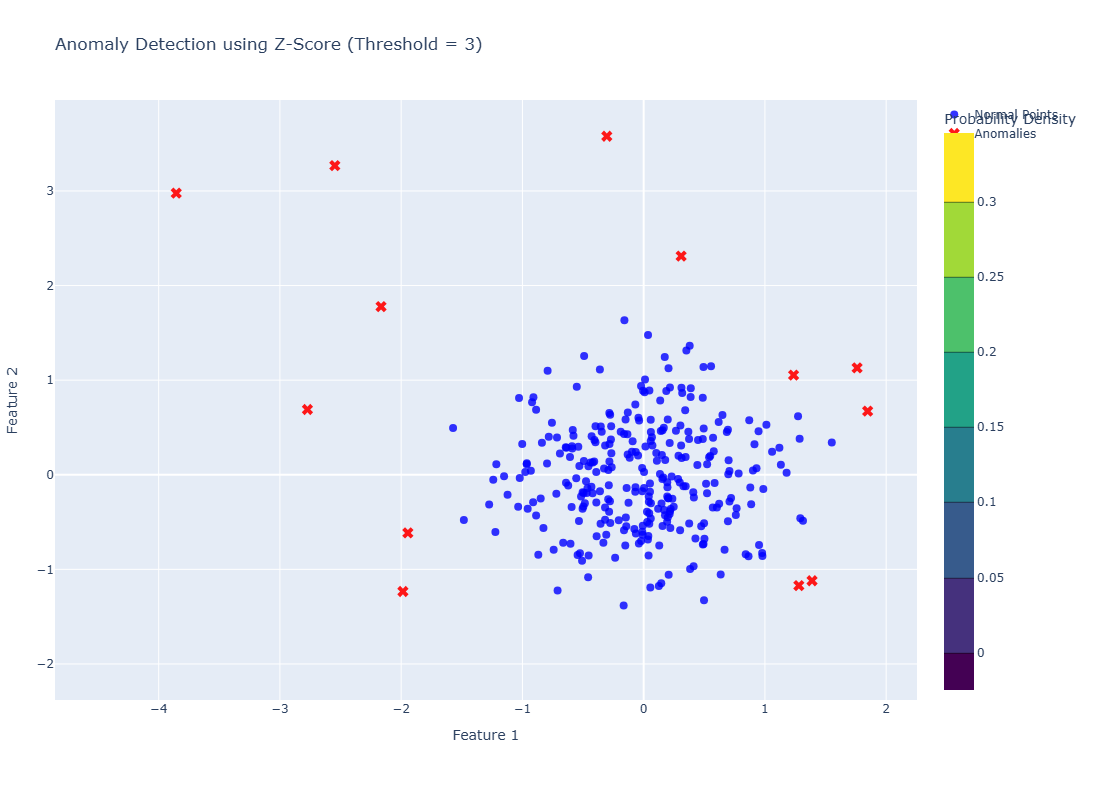

In [4]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import zscore, multivariate_normal
import matplotlib.pyplot as plt

def generate_2d_data(n_samples=300, n_anomalies=10, cluster_std=0.60, random_state=42):
    """Generate synthetic 2D data with some anomalies."""
    np.random.seed(random_state)
    # Generate 2D normal distribution data (mean = 0, std = cluster_std)
    X = np.random.normal(loc=0, scale=cluster_std, size=(n_samples, 2))
    # Add random anomalies
    anomalies = np.random.uniform(low=-4, high=4, size=(n_anomalies, 2))
    # Combine normal data and anomalies
    return np.vstack([X, anomalies])

def detect_anomalies_zscore(X, threshold=3):
    """Detect anomalies using Z-score method."""
    # Compute the Z-scores for the data (zscore along each dimension)
    z_scores = np.abs(zscore(X, axis=0))  # Compute Z-scores per feature (dimension)
    # Calculate the combined Z-score (sum of Z-scores in both dimensions)
    combined_z_scores = np.sum(z_scores, axis=1)
    # Identify points where combined Z-scores exceed the threshold
    anomalies = X[combined_z_scores > threshold]
    return anomalies, combined_z_scores

def plot_2d_anomalies_with_distribution(X, anomalies, title="Anomaly Detection using Z-Score"):
    """Plot the 2D dataset with anomalies highlighted and Normal Distribution contour."""
    # Plot normal points (all points except anomalies)
    normal_points = X[~np.isin(X, anomalies).all(axis=1)]
    
    # Plot 2D Normal Distribution curve (contours)
    mean = np.mean(X, axis=0)
    cov = np.cov(X, rowvar=False)  # Covariance matrix
    x, y = np.mgrid[min(X[:, 0])-1:max(X[:, 0])+1:0.1, min(X[:, 1])-1:max(X[:, 1])+1:0.1]
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(pos)
    
    # Plot using Plotly
    fig = go.Figure()

    # Add the Normal Distribution contour
    fig.add_trace(go.Contour(
        x=x[0], y=y[:, 0], z=z,
        colorscale='Viridis',
        colorbar=dict(title='Probability Density'),
        name='Normal Distribution Contours'
    ))

    # Add normal points
    fig.add_trace(go.Scatter(
        x=normal_points[:, 0], y=normal_points[:, 1],
        mode='markers',
        marker=dict(size=8, color='blue', opacity=0.8),
        name='Normal Points'
    ))
    
    # Add anomalies
    fig.add_trace(go.Scatter(
        x=anomalies[:, 0], y=anomalies[:, 1],
        mode='markers',
        marker=dict(size=10, color='red', symbol='x', opacity=0.9),
        name='Anomalies'
    ))

    fig.update_layout(
        title=title,
        width=1000,  # Increased width
        height=800,  # Increased height
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        showlegend=True,
        margin=dict(l=50, r=50, t=100, b=100)  # Increased margins for better spacing
    )
    fig.show()

def main():
    # Parameters
    n_samples = 300
    n_anomalies = 10
    cluster_std = 0.60
    z_threshold = 3  # Z-score threshold for anomaly detection
    
    # Generate and plot data
    X = generate_2d_data(n_samples=n_samples, n_anomalies=n_anomalies, cluster_std=cluster_std)
    
    # Detect anomalies using Z-score
    anomalies, combined_z_scores = detect_anomalies_zscore(X, threshold=z_threshold)
    print(f"Number of detected anomalies: {len(anomalies)}")
    
    # Plot anomalies with Normal Distribution contours
    plot_2d_anomalies_with_distribution(X, anomalies, title=f"Anomaly Detection using Z-Score (Threshold = {z_threshold})")

if __name__ == "__main__":
    main()
